<a href="https://colab.research.google.com/github/sandeepjanapati/Ground-Vibration-Calculator/blob/main/Ground_Vibration_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow import keras
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import  Dense
from keras.optimizers import Adam
import random
random.seed(0)
np.random.seed(0)

In [3]:
dataset = pd.read_csv('/content/ROCK BLAST DATA.csv')
features_name = ['Spacing(m)','Burden (m)','Powder Factor(kg/m3)','MCPD (kg/D)','Seis. Dist. (m)','PPV MON']
df = dataset[features_name]
df =df.rename(columns={'Spacing(m)': 'Spacing','Burden (m)':'Burden','Powder Factor(kg/m3)':'Powder Factor','MCPD (kg/D)':'MCPD', 'Seis. Dist. (m)': 'Distance', 'PPV MON': "PPV"})
df

,Spacing,Burden,Powder Factor,MCPD,Distance,PPV
0,3.0,3.0,0.57,113,360.00,10.500
1,3.2,2.8,0.52,35,315.00,2.750
2,3.0,3.0,0.35,28.44,410.00,1.450
3,3.5,2.8,0.33,43.33,465.00,0.992
4,3.8,3.0,0.32,50,290.00,5.120
...,...,...,...,...,...,...
981,3.6,3.2,0.54,250,3.94,300.000
982,3.6,3.2,0.54,186.78,3.18,400.000
983,3.5,3.0,0.58,116.66,9.40,280.000
984,3.5,3.0,0.62,104.16,13.70,230.000


In [4]:
df.isnull().sum()

,0
Spacing,0
Burden,0
Powder Factor,0
MCPD,1
Distance,56
PPV,91


In [5]:
df =df.replace("NA", " ")
df =df.replace(' NA', " ")
df = df.replace(r'^\s*$', np.nan, regex=True)
blast_data =df.dropna( axis=0)

In [6]:
blast_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 985
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Spacing        892 non-null    float64
 1   Burden         892 non-null    float64
 2   Powder Factor  892 non-null    float64
 3   MCPD           892 non-null    object 
 4   Distance       892 non-null    float64
 5   PPV            892 non-null    float64
dtypes: float64(5), object(1)
memory usage: 48.8+ KB


In [7]:
blast_data=blast_data.astype(float)

In [8]:
blast_data.describe()

,Spacing,Burden,Powder Factor,MCPD,Distance,PPV
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,3.325673,2.935146,0.511742,95.648553,348.164371,29.912667
std,0.400606,0.257548,0.288341,69.202316,121.847382,100.715235
min,1.000000,0.900000,0.090000,5.000000,0.508000,0.039700
25%,3.000000,2.800000,0.440000,42.500000,310.000000,1.360000
50%,3.200000,3.000000,0.510000,77.570000,370.000000,2.410000
75%,3.500000,3.000000,0.570000,134.155000,410.000000,4.700000
max,4.300000,4.000000,8.330000,410.000000,740.000000,590.000000


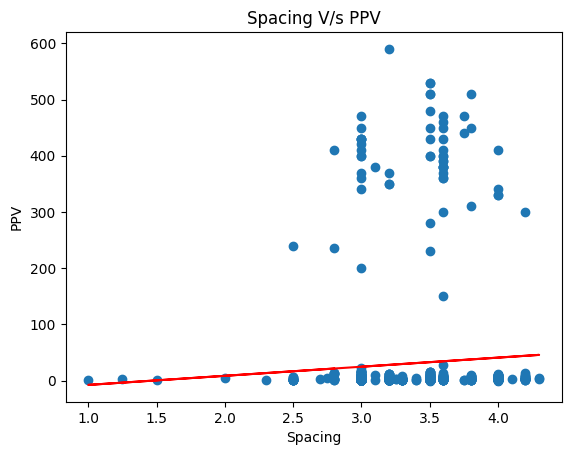

Trend line: y = 16.20x + -23.95


In [9]:
xaxis = 'Spacing'
yaxis = 'PPV'
plt.scatter(blast_data[xaxis], blast_data[yaxis] )
plt.xlabel(xaxis)
plt.ylabel(yaxis)
plt.title("Spacing V/s PPV")
m, b = np.polyfit(blast_data[xaxis], blast_data[yaxis], 1)
plt.plot(blast_data[xaxis], m*blast_data[xaxis] + b, color='red')
plt.show()
print(f'Trend line: y = {m:.2f}x + {b:.2f}')

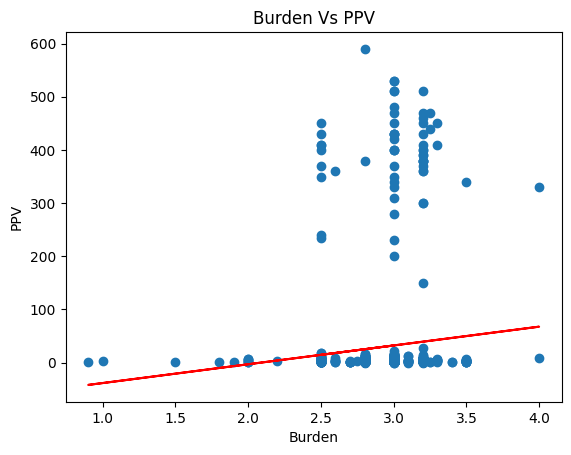

Trend line: y = 35.35x + -73.83


In [10]:
xaxis = 'Burden'
yaxis = 'PPV'
plt.scatter(blast_data[xaxis], blast_data[yaxis] )
plt.xlabel(xaxis)
plt.ylabel(yaxis)
title = str(xaxis) + " Vs PPV"
plt.title(title)
m, b = np.polyfit(blast_data[xaxis], blast_data[yaxis], 1)
plt.plot(blast_data[xaxis], m*blast_data[xaxis] + b, color='red')
plt.show()
print(f'Trend line: y = {m:.2f}x + {b:.2f}')

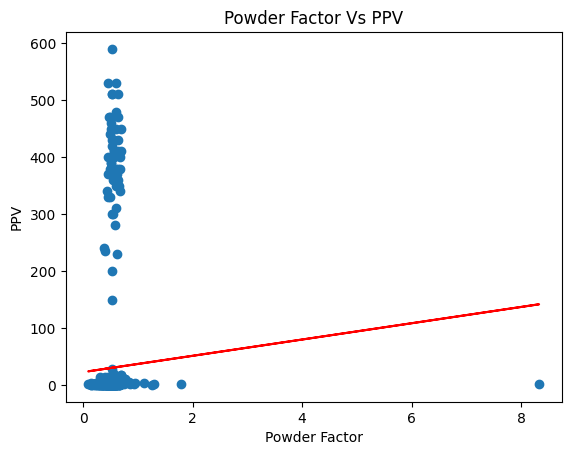

Trend line: y = 14.29x + 22.60


In [11]:
xaxis = 'Powder Factor'
yaxis = 'PPV'
plt.scatter(blast_data[xaxis], blast_data[yaxis] )
plt.xlabel(xaxis)
plt.ylabel(yaxis)
title = str(xaxis) + " Vs PPV"
plt.title(title)
m, b = np.polyfit(blast_data[xaxis], blast_data[yaxis], 1)
plt.plot(blast_data[xaxis], m*blast_data[xaxis] + b, color='red')
plt.show()
print(f'Trend line: y = {m:.2f}x + {b:.2f}')

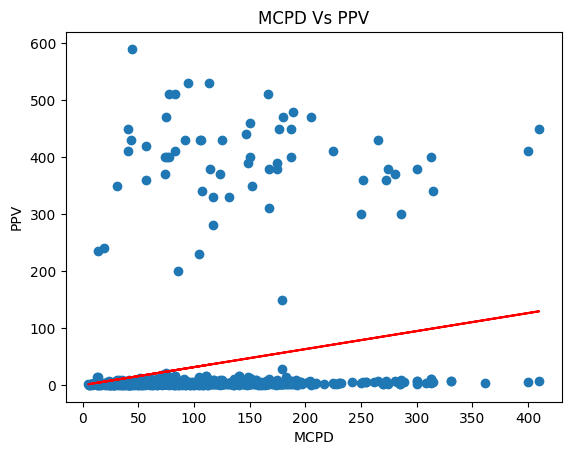

Trend line: y = 0.32x + -0.34


In [12]:
xaxis = 'MCPD'
yaxis = 'PPV'
plt.scatter(blast_data[xaxis], blast_data[yaxis] )
plt.xlabel(xaxis)
plt.ylabel(yaxis)
title = str(xaxis) + " Vs PPV"
plt.title(title)
m, b = np.polyfit(blast_data[xaxis], blast_data[yaxis], 1)
plt.plot(blast_data[xaxis], m*blast_data[xaxis] + b, color='red')
plt.show()
print(f'Trend line: y = {m:.2f}x + {b:.2f}')

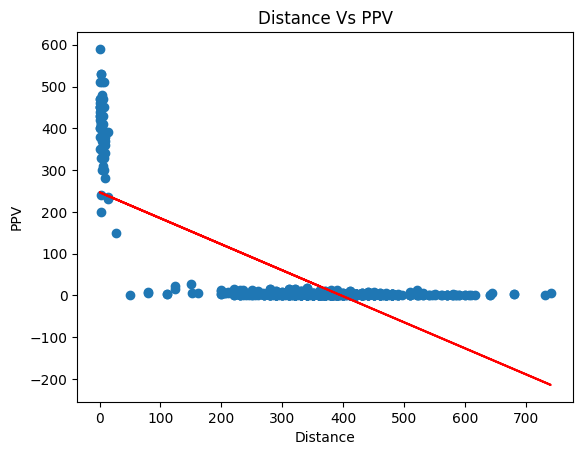

Trend line: y = -0.62x + 246.89


In [13]:
xaxis = 'Distance'
yaxis = 'PPV'
plt.scatter(blast_data[xaxis], blast_data[yaxis] )
plt.xlabel(xaxis)
plt.ylabel(yaxis)
title = str(xaxis) + " Vs PPV"
plt.title(title)
m, b = np.polyfit(blast_data[xaxis], blast_data[yaxis], 1)
plt.plot(blast_data[xaxis], m*blast_data[xaxis] + b, color='red')
plt.show()
print(f'Trend line: y = {m:.2f}x + {b:.2f}')

In [14]:
x = blast_data.iloc[:, :-1].values
y = blast_data.iloc[:, -1].values

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.15, random_state = 1)
x_train = np.tile(x_train, (20,1))
y_train = np.tile(y_train, 20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(15160, 5)
(15160,)
(134, 5)
(134,)


In [20]:
model = Sequential([
    Dense(15, activation="relu", kernel_regularizer=regularizers.l1(0.0001), input_dim=5),
    Dense(20, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
    Dense(10, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
    Dense(10, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
    Dense(5, activation="relu", kernel_regularizer=regularizers.l1(0.0001)),
    Dense(1, activation="relu", kernel_regularizer=regularizers.l1(0.0001))
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer="adam", loss='mean_squared_error')


In [22]:
model_perform =model.fit(x_train,y_train, epochs=35, steps_per_epoch=110, validation_data = (x_test, y_test), validation_split=0.15)

Epoch 1/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 10152.2305 - val_loss: 15402.6621
Epoch 2/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.0000e+00 - val_loss: 15402.6621
Epoch 3/35
 50/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8698.0957

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7781.5776 - val_loss: 3796.7085
Epoch 4/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.0000e+00 - val_loss: 3796.7085
Epoch 5/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1828.4178 - val_loss: 1214.7874
Epoch 6/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0000e+00 - val_loss: 1214.7874
Epoch 7/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1047.1356 - val_loss: 929.4476
Epoch 8/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.0000e+00 - val_loss: 929.4476
Epoch 9/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 865.1284 - val_loss: 736.7682
Epoch 10/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.0000e+00 - val_loss: 736.7682
Epoch 11/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 754.2962 - val_loss: 588.1321
Epoch 12/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 0.0000e+00 - val_loss: 588.1321
Epoch 13/35
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 687.4975 - val_loss:

In [23]:
y_predict = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [24]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_predict)
print("R-squared value:", r_squared)


R-squared value: 0.9860416499072371


In [28]:

weights_1, bias_1 = model.layers[0].get_weights()
weights_2, bias_2 = model.layers[1].get_weights()
weights_3, bias_3 = model.layers[2].get_weights()
weights_4, bias_4 = model.layers[3].get_weights()
weights_5, bias_5 = model.layers[4].get_weights()
weights_6, bias_6 = model.layers[5].get_weights()


In [27]:
weights_1_array = np.array(weights_1)
bias_1_array = np.array(bias_1)
weights_2_array = np.array(weights_2)
bias_2_array = np.array(bias_2)
weights_3_array = np.array(weights_3)
bias_3_array = np.array(bias_3)
weights_4_array = np.array(weights_4)
bias_4_array = np.array(bias_4)
weights_5_array = np.array(weights_5)
bias_5_array = np.array(bias_5)
weights_6_array = np.array(weights_6)
bias_6_array = np.array(bias_6)


In [29]:

np.savetxt("weights_layer1.csv", weights_1_array, delimiter=",")
np.savetxt("biases_layer1.csv", bias_1_array, delimiter=",")
np.savetxt("weights_layer2.csv", weights_2_array, delimiter=",")
np.savetxt("biases_layer2.csv", bias_2_array, delimiter=",")
np.savetxt("weights_layer3.csv", weights_3_array, delimiter=",")
np.savetxt("biases_layer3.csv", bias_3_array, delimiter=",")
np.savetxt("weights_layer4.csv", weights_4_array, delimiter=",")
np.savetxt("biases_layer4.csv", bias_4_array, delimiter=",")
np.savetxt("weights_layer5.csv", weights_5_array, delimiter=",")
np.savetxt("biases_layer5.csv", bias_5_array, delimiter=",")
np.savetxt("weights_layer6.csv", weights_6_array, delimiter=",")
np.savetxt("biases_layer6.csv", bias_6_array, delimiter=",")

